#Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Mean velocity = $193\,\frac{m}{s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Precession time = $100\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**Diffuse reflection probability = $100\%$**

**Dipoles centered radially and pointing up**

**Each point represents the results of 1000 particles ran for parallel field case only**

In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20

meas_time = 100

dist_range = np.concatenate([[.001], np.arange(.01, .11, .01)])
dip_str_range=srkmisc.even_sample_over_log(1e-18, 1e-13, 6)
legend_titles_dist=[str(x*1000)+' $mm$ from bottom' for x in dist_range[0:len(dist_range)*len(dip_str_range)]]
legend_titles_dipstr=[str(t)+' $T m^3$ dipole strength ' for t in srkmisc.even_sample_over_log(1e-18, 1e-13, 6)]

#$E_0$ = $0 \frac{MV}{m}$

In [2]:
rid_list = range(377, 443) # E=0
axis_range_for_stdev = [ 8e-19, 2e-13,1e-10, 1e-1]

# rid_list = range(509, 575) # E= 0.5 MV/m
# axis_range_for_stdev = [ 8e-19, 2e-13,1e-7, 1e-1] #E > 0

# rid_list = range(443, 509) # E= 1 MV/m
# axis_range_for_stdev = [ 8e-19, 2e-13,1e-6, 1e-1] #E > 0

lines_dipstr = [rid_list[x:x+len(dist_range)] for x in xrange(0, len(rid_list), len(dist_range))]
lines = zip(*lines_dipstr)

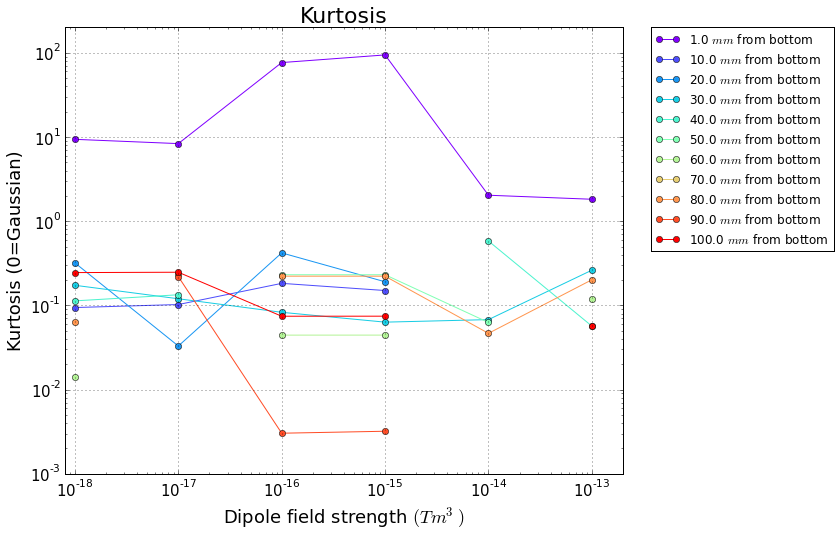

In [3]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'Dipole field strength $(T m^3)$', fontsize=18)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

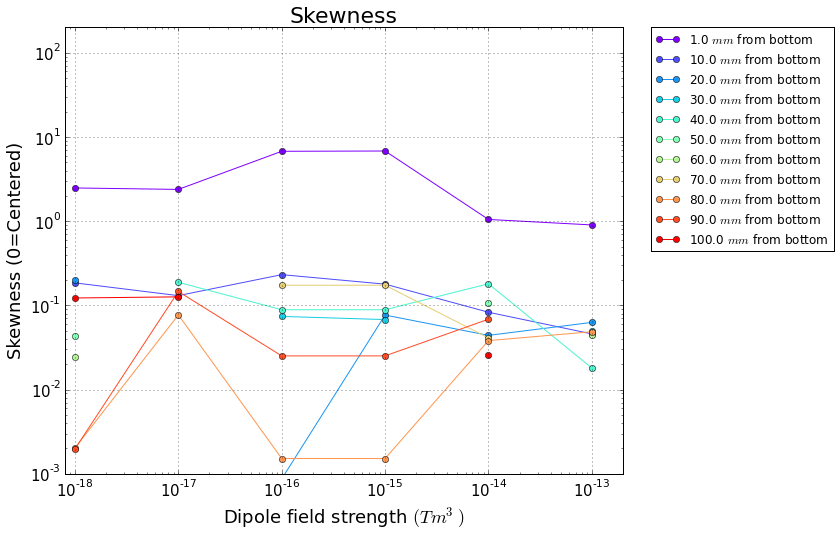

In [4]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiSkewness")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'Dipole field strength $(T m^3)$', fontsize=18)
plt.ylabel('Skewness (0=Centered)', fontsize=18)
plt.title('Skewness', fontsize=22)
plt.grid(True)
plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

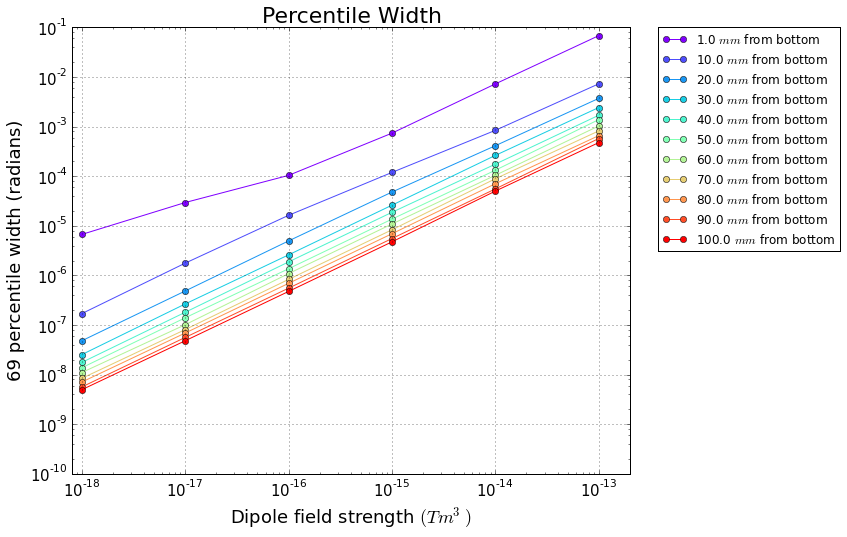

In [4]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiPercentileWidth")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))
plt.tick_params(labelsize=15)
plt.xlabel(r'Dipole field strength $(T m^3)$', fontsize=18)
plt.ylabel('69 percentile width (radians)', fontsize=18)
plt.title('Percentile Width', fontsize=22)
plt.grid(True)
plt.axis(axis_range_for_stdev)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

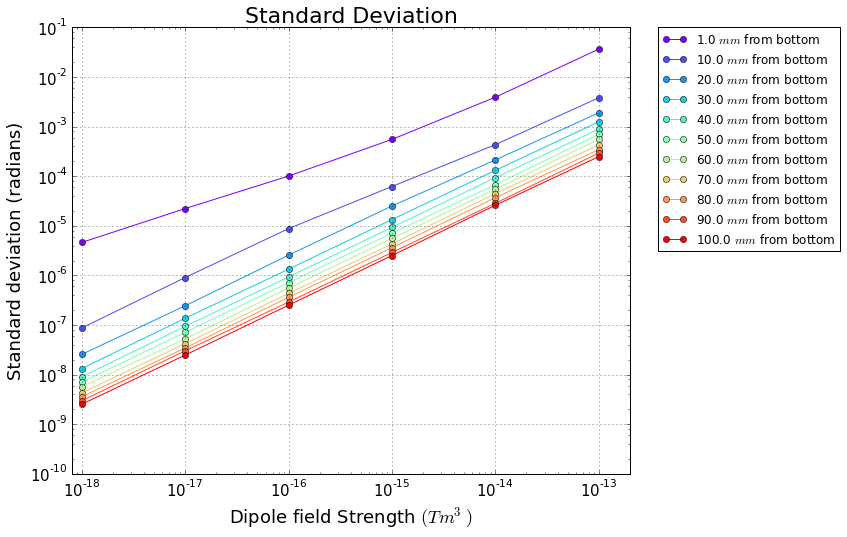

In [5]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))
plt.xlabel(r'Dipole field Strength $(T m^3)$', fontsize=18)
plt.ylabel('Standard deviation (radians)', fontsize=18)
plt.title('Standard Deviation', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
plt.axis(axis_range_for_stdev)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [2]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    b=list(b)
    a=list(a)
    for j in range(len(b)):
        a[j] = (a[j]/pow(0.025,3))*1.e12
        b[j] = srkanalysis.convert_std_dev_to_false_edm_measurement_error(b[j],1e6,meas_time,1e8)
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i])
plt.xlabel(r'Dipole Field Str. at 2.5 cm Away $(pT)$', fontsize=18)
plt.ylabel('False EDM Noise Presuming 1e8 particles (e cm)', fontsize=18)
plt.title('False EDM Noise (presumes 1e6 MV/m for effect size)', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
#plt.axis([ 1e-2, 1e4,1e4, 1e12])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'lines' is not defined

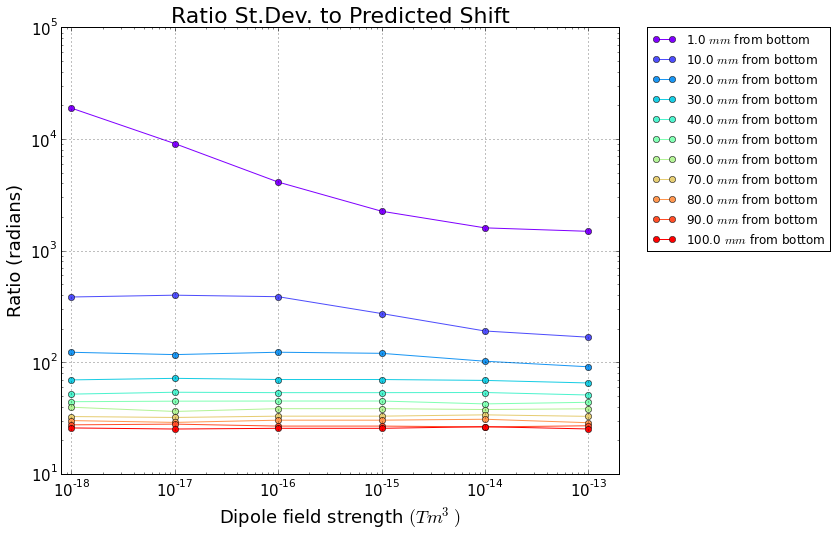

In [7]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "PRPrediction")
z,w=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    c,d=zip(*sorted(zip(z[i],w[i]), key=lambda x: x[0]))
    b=list(b)
    for j in range(len(b)):
        b[j] = d[j]/(abs(b[j] / (100. * 6.582E-016 / (4. * 1e6)))*100.)
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))
plt.xlabel(r'Dipole field strength $(T m^3)$', fontsize=18)
plt.ylabel('Ratio (radians)', fontsize=18)
plt.title('Ratio St.Dev. to Predicted Shift', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
plt.axis([ 8e-19, 2e-13,1e1, 1e5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

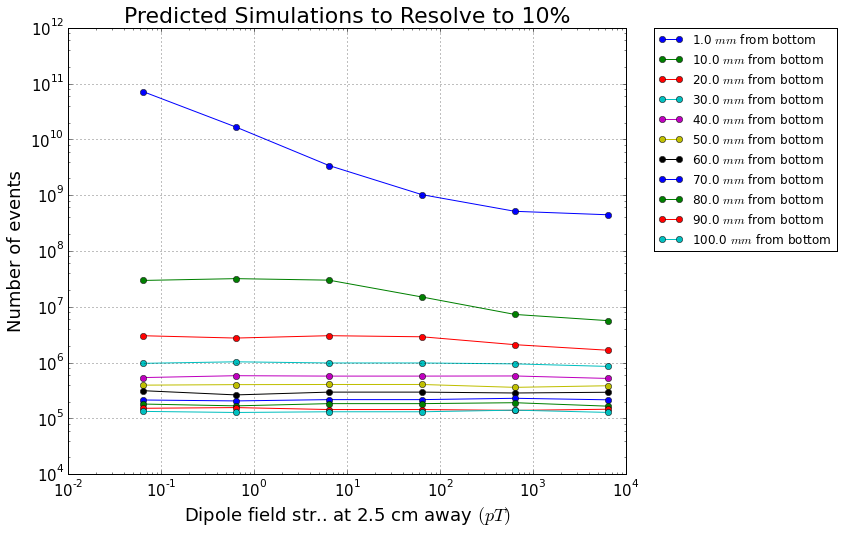

In [8]:
x,y=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "PRPrediction")
z,w=srkdata.get_plot_data_from_database(lines, "DipoleFieldStrength", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    c,d=zip(*sorted(zip(z[i],w[i]), key=lambda x: x[0]))
    b=list(b)
    a=list(a)
    for j in range(len(b)):
        a[j] = (a[j]/pow(0.025,3))*1.e12
        b[j] = pow(d[j]*math.sqrt(2)*10./(abs(b[j] / (100. * 6.582E-016 / (4. * 1e6)))*100.),2)
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i])
plt.xlabel(r'Dipole field str.. at 2.5 cm away $(pT)$', fontsize=18)
plt.ylabel('Number of events', fontsize=18)
plt.title('Predicted Simulations to Resolve to 10%', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
plt.axis([ 1e-2, 1e4,1e4, 1e12])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

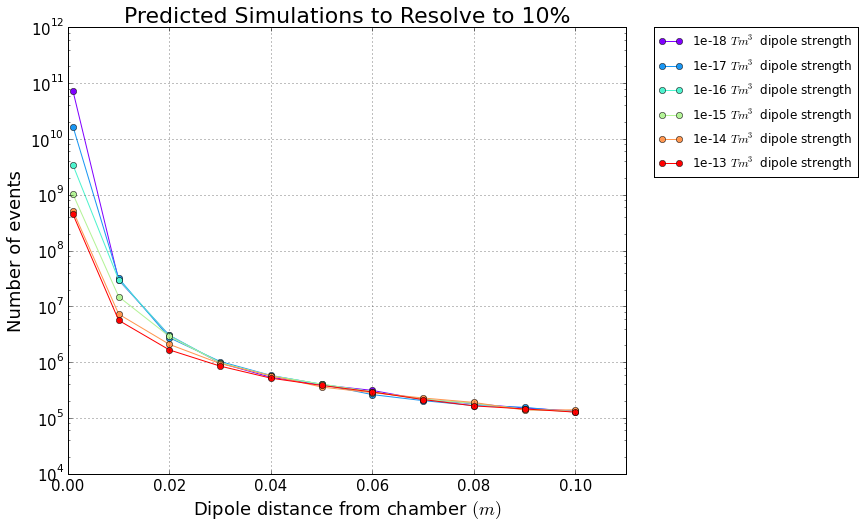

In [9]:
x,y=srkdata.get_plot_data_from_database(lines_dipstr, "DipolePosition", "PRPrediction")
z,w=srkdata.get_plot_data_from_database(lines_dipstr, "DipolePosition", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines_dipstr))))
x=list(x)
for i in range(len(x)):
    x[i]=list(x[i])
    for j in range(len(x[i])):
        x[i][j] = -float(x[i][j].split(' ')[2]) - 0.06
e,f=[],[]
for i in range(len(lines_dipstr)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    c,d=zip(*sorted(zip(z[i],w[i]), key=lambda x: x[0]))
    #a,b=x,y
    #c,d=z,w
    b=list(b)
    a=list(a)
    for j in range(len(b)):
        a[j] = a[j]
        b[j] = pow(d[j]*math.sqrt(2)*10./(abs(b[j] / (100. * 6.582E-016 / (4. * 1e6)))*100.),2)
    e.append(a)
    f.append(b)
    plt.semilogy(a,b,marker='o',label = legend_titles_dipstr[i],c=next(color))
    
    

# coefficients = np.polyfit(e[0],f[0],6)
# print coefficients
# polynomial=np.poly1d(coefficients)
# xs = dist_range
# ys = polynomial(xs)
# plt.semilogy(xs,ys, label = "Fit")
    
    
plt.xlabel(r'Dipole distance from chamber $(m)$', fontsize=18)
plt.ylabel('Number of events', fontsize=18)
plt.title('Predicted Simulations to Resolve to 10%', fontsize=22)
plt.grid(True)
plt.axis([ 0, 0.11,1e4, 1e12])
plt.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()